<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/NhandienKhuonMat1nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m


In [72]:
#get data
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre = x_train[50]
x_pre1 = x_train[10]
x_train = x_train[:194] #299 la 3 anh
y_train = y_train[:194]
y_train




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [73]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

x_train[0]


array([0.9098039 , 0.4627451 , 0.00392157, ..., 0.16470589, 0.18039216,
       0.21960784], dtype=float32)

In [74]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (67500,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)



Epoch 1/50
2/2 [==============================] - 1s 196ms/step - loss: 0.6632 - acc: 0.6250 - val_loss: 0.3391 - val_acc: 0.9167
Epoch 2/50
2/2 [==============================] - 0s 51ms/step - loss: 1.5815 - acc: 0.7917 - val_loss: 1.2503 - val_acc: 0.1667
Epoch 3/50
2/2 [==============================] - 0s 57ms/step - loss: 0.8765 - acc: 0.5833 - val_loss: 7.6665 - val_acc: 0.1667
Epoch 4/50
2/2 [==============================] - 0s 52ms/step - loss: 2.9740 - acc: 0.5833 - val_loss: 0.8373 - val_acc: 0.7500
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 0.5451 - acc: 0.8542 - val_loss: 0.6266 - val_acc: 0.8333
Epoch 6/50
2/2 [==============================] - 0s 59ms/step - loss: 0.2768 - acc: 0.9375 - val_loss: 0.4697 - val_acc: 0.8333
Epoch 7/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1241 - acc: 1.0000 - val_loss: 0.5253 - val_acc: 0.9167
Epoch 8/50
2/2 [==============================] - 0s 56ms/step - loss: 0.1169 - acc: 0.9792 - va

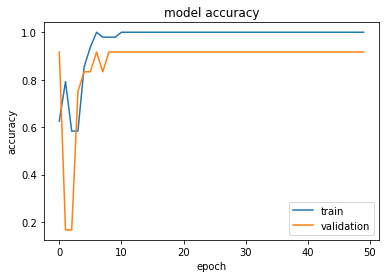

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [76]:

img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255
img1 = x_pre1.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255


1
Day la Quan


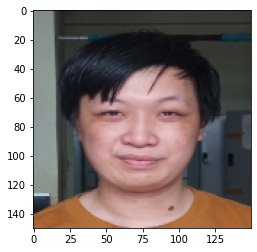

In [77]:
#nhận dạng
k = np.argmax(model.predict(img))
print(k)
if k ==0:
  print('Khong phai Quan')
if k == 1:
 print('Day la Quan')

plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))


0
Khong phai Quan


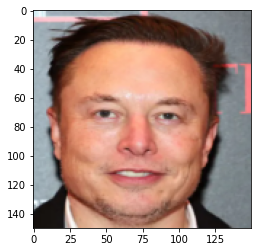

In [78]:
k1 = np.argmax(model.predict(img1))
print(k1)
if k1 ==0:
  print('Khong phai Quan')
if k1 == 1:
 print('Day la Quan')

plt.imshow(cv2.cvtColor(x_pre1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))